<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploring-the-Google-Mobility-Data" data-toc-modified-id="Exploring-the-Google-Mobility-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploring the Google Mobility Data</a></span><ul class="toc-item"><li><span><a href="#What-if-we-plot-everything?" data-toc-modified-id="What-if-we-plot-everything?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>What if we plot everything?</a></span></li><li><span><a href="#Seems-good.-What-if-I-highlight-only-one-place-at-a-time?" data-toc-modified-id="Seems-good.-What-if-I-highlight-only-one-place-at-a-time?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Seems good. What if I highlight only one place at a time?</a></span><ul class="toc-item"><li><span><a href="#Let's-highlight-residential-places!" data-toc-modified-id="Let's-highlight-residential-places!-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Let's highlight residential places!</a></span></li><li><span><a href="#Let's-highlight-workplaces!" data-toc-modified-id="Let's-highlight-workplaces!-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Let's highlight workplaces!</a></span></li></ul></li></ul></li></ul></div>

# Exploring the Google Mobility Data

**As stated in the source data (https://www.google.com/covid19/mobility/):**

"As global communities responded to COVID-19, we heard from public health officials that the same type of aggregated, anonymized insights we use in products such as Google Maps would be helpful as they made critical decisions to combat COVID-19.

These Community Mobility Reports aimed to provide insights into what changed in response to policies aimed at combating COVID-19. The reports charted movement trends over time by geography, across different categories of places such as retail and recreation, groceries and pharmacies, parks, transit stations, workplaces, and residential."

**Baseline:** The data shows how visitors to (or time spent in) categorized places change compared to our baseline days. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5‑week period Jan 3 – Feb 6, 2020.

In [1]:
# Import libraries
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Preliminary set tick sizes of x and y axes for plots
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.labelsize'] = 16

In [3]:
# Load all data sets
mobility_2020 = pd.read_csv(
    "2020_PH_Region_Mobility_Report.csv"
)
mobility_2021 = pd.read_csv(
    "2021_PH_Region_Mobility_Report.csv"
)

In [4]:
# Explore the data
mobility_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8346 entries, 0 to 8345
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   country_region_code                                 8346 non-null   object 
 1   country_region                                      8346 non-null   object 
 2   sub_region_1                                        5457 non-null   object 
 3   sub_region_2                                        0 non-null      float64
 4   metro_area                                          2568 non-null   object 
 5   iso_3166_2_code                                     5457 non-null   object 
 6   census_fips_code                                    0 non-null      float64
 7   place_id                                            8346 non-null   object 
 8   date                                                8346 non-null   object 
 9

In [5]:
# Show the data
mobility_2020

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,PH,Philippines,NaN,NaN,NaN,NaN,NaN,ChIJY96HXyFTQDIRV9opeu-QR3g,2020-02-15,7.0,4.0,-1.0,1.0,6.0,0.0
1,PH,Philippines,NaN,NaN,NaN,NaN,NaN,ChIJY96HXyFTQDIRV9opeu-QR3g,2020-02-16,3.0,5.0,-2.0,-3.0,1.0,1.0
2,PH,Philippines,NaN,NaN,NaN,NaN,NaN,ChIJY96HXyFTQDIRV9opeu-QR3g,2020-02-17,-1.0,0.0,-3.0,-2.0,8.0,1.0
3,PH,Philippines,NaN,NaN,NaN,NaN,NaN,ChIJY96HXyFTQDIRV9opeu-QR3g,2020-02-18,0.0,1.0,-3.0,0.0,5.0,0.0
4,PH,Philippines,NaN,NaN,NaN,NaN,NaN,ChIJY96HXyFTQDIRV9opeu-QR3g,2020-02-19,-3.0,-3.0,-4.0,-6.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8341,PH,Philippines,Zamboanga Peninsula,NaN,NaN,PH-09,NaN,ChIJ7XVqWKfhUzIR4kPY7diFOuY,2020-12-27,-18.0,13.0,11.0,-16.0,-1.0,10.0
8342,PH,Philippines,Zamboanga Peninsula,NaN,NaN,PH-09,NaN,ChIJ7XVqWKfhUzIR4kPY7diFOuY,2020-12-28,0.0,33.0,12.0,-8.0,-31.0,17.0
8343,PH,Philippines,Zamboanga Peninsula,NaN,NaN,PH-09,NaN,ChIJ7XVqWKfhUzIR4kPY7diFOuY,2020-12-29,3.0,31.0,9.0,-11.0,-32.0,17.0
8344,PH,Philippines,Zamboanga Peninsula,NaN,NaN,PH-09,NaN,ChIJ7XVqWKfhUzIR4kPY7diFOuY,2020-12-30,8.0,59.0,20.0,-4.0,-47.0,17.0


In [6]:
# Explore unique sub-region 1
mobility_2020['sub_region_1'].unique()

array([nan, 'Autonomous Region in Muslim Mindanao', 'Bicol',
       'Cagayan Valley', 'Calabarzon', 'Caraga', 'Central Luzon',
       'Central Visayas', 'Cordillera Administrative Region',
       'Davao Region', 'Eastern Visayas', 'Ilocos Region', 'MIMAROPA',
       'National Capital Region', 'Northern Mindanao', 'SOCCSKSARGEN',
       'Western Visayas', 'Zamboanga Peninsula'], dtype=object)

In [7]:
# Concatenate the 2020 and 2021 mobility data
mobility = pd.concat([mobility_2020, mobility_2021])

In [8]:
# Filter mobility data to Manila Metropolitan Area 
mobility = mobility[mobility["metro_area"] == "Manila Metropolitan Area"]

In [9]:
# Extract useful columns (columns 8 until 14) of mobility data set
mobility = mobility.iloc[:, range(8, 15)]

In [10]:
# Convert date string object to datetime object for each data set
mobility["date"] = pd.to_datetime(mobility["date"])

## What if we plot everything?

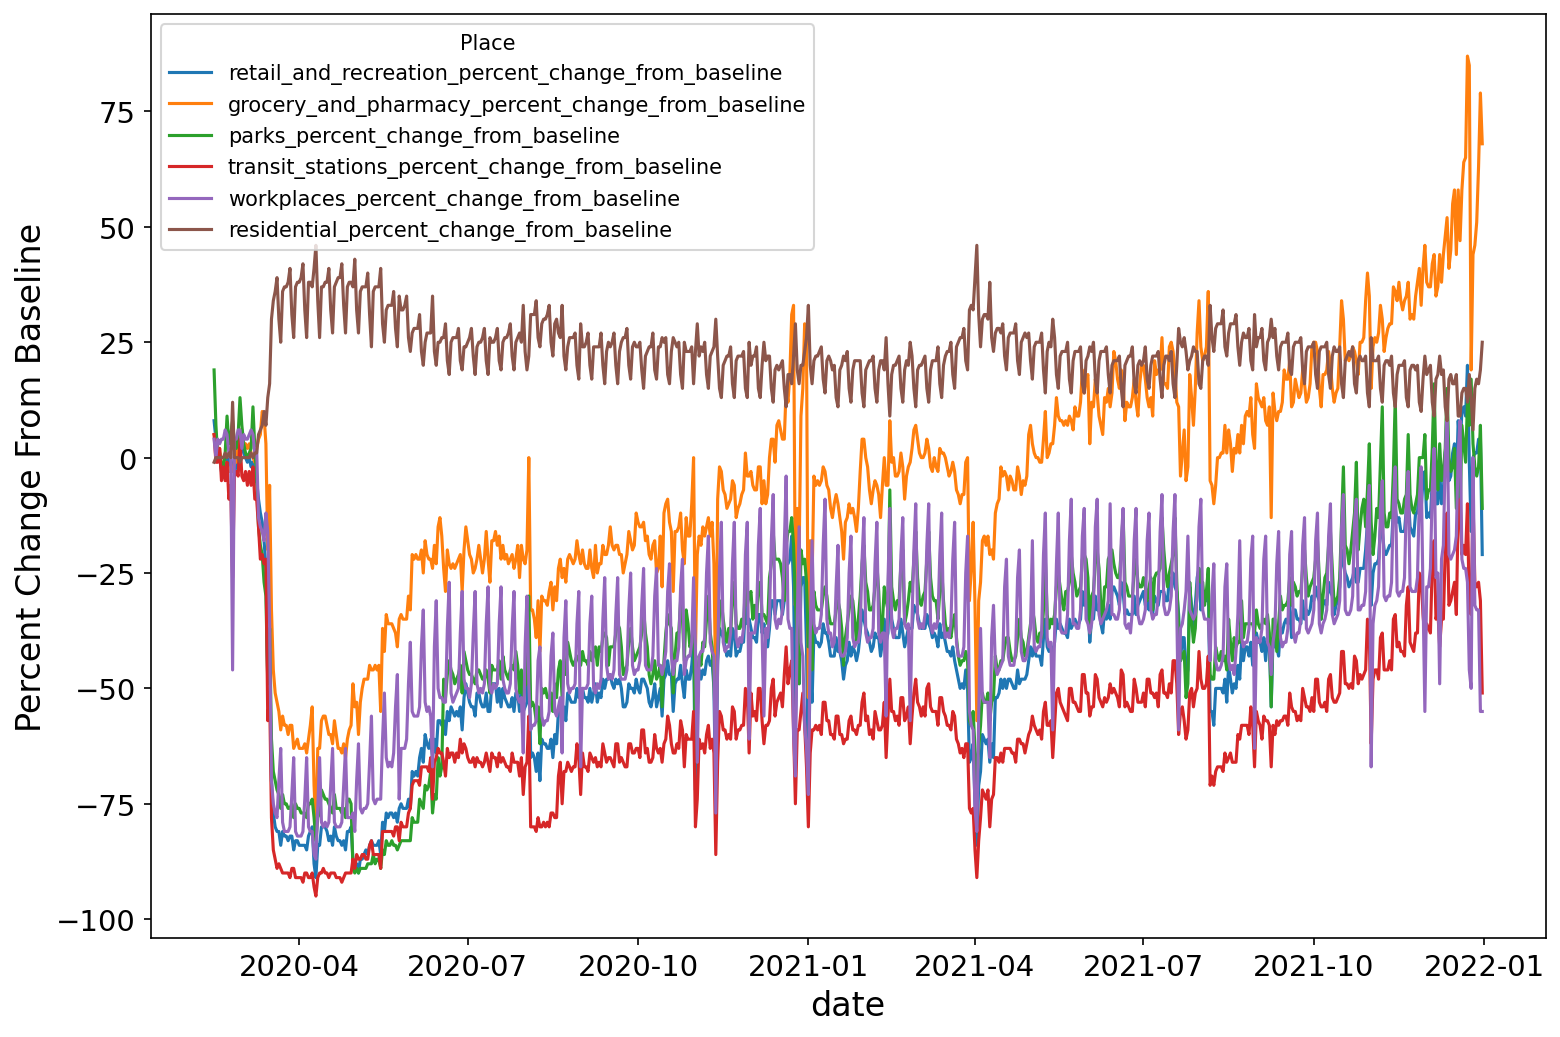

In [11]:
# Prepare figure
plt.figure(figsize=(12,8), dpi = 150)

# Melt the data
melted_data = pd.melt(mobility, ['date'])

# Rename data
melted_data = melted_data.rename(
    columns={
        "variable": "Place",
        "value": "Percent Change From Baseline"
    }
)

# Plot all data
sns.lineplot(
    x='date', 
    y='Percent Change From Baseline', 
    hue='Place', 
    data=melted_data
)

# Show data
plt.show()

## Seems good. What if I highlight only one place at a time?

### Let's highlight residential places!

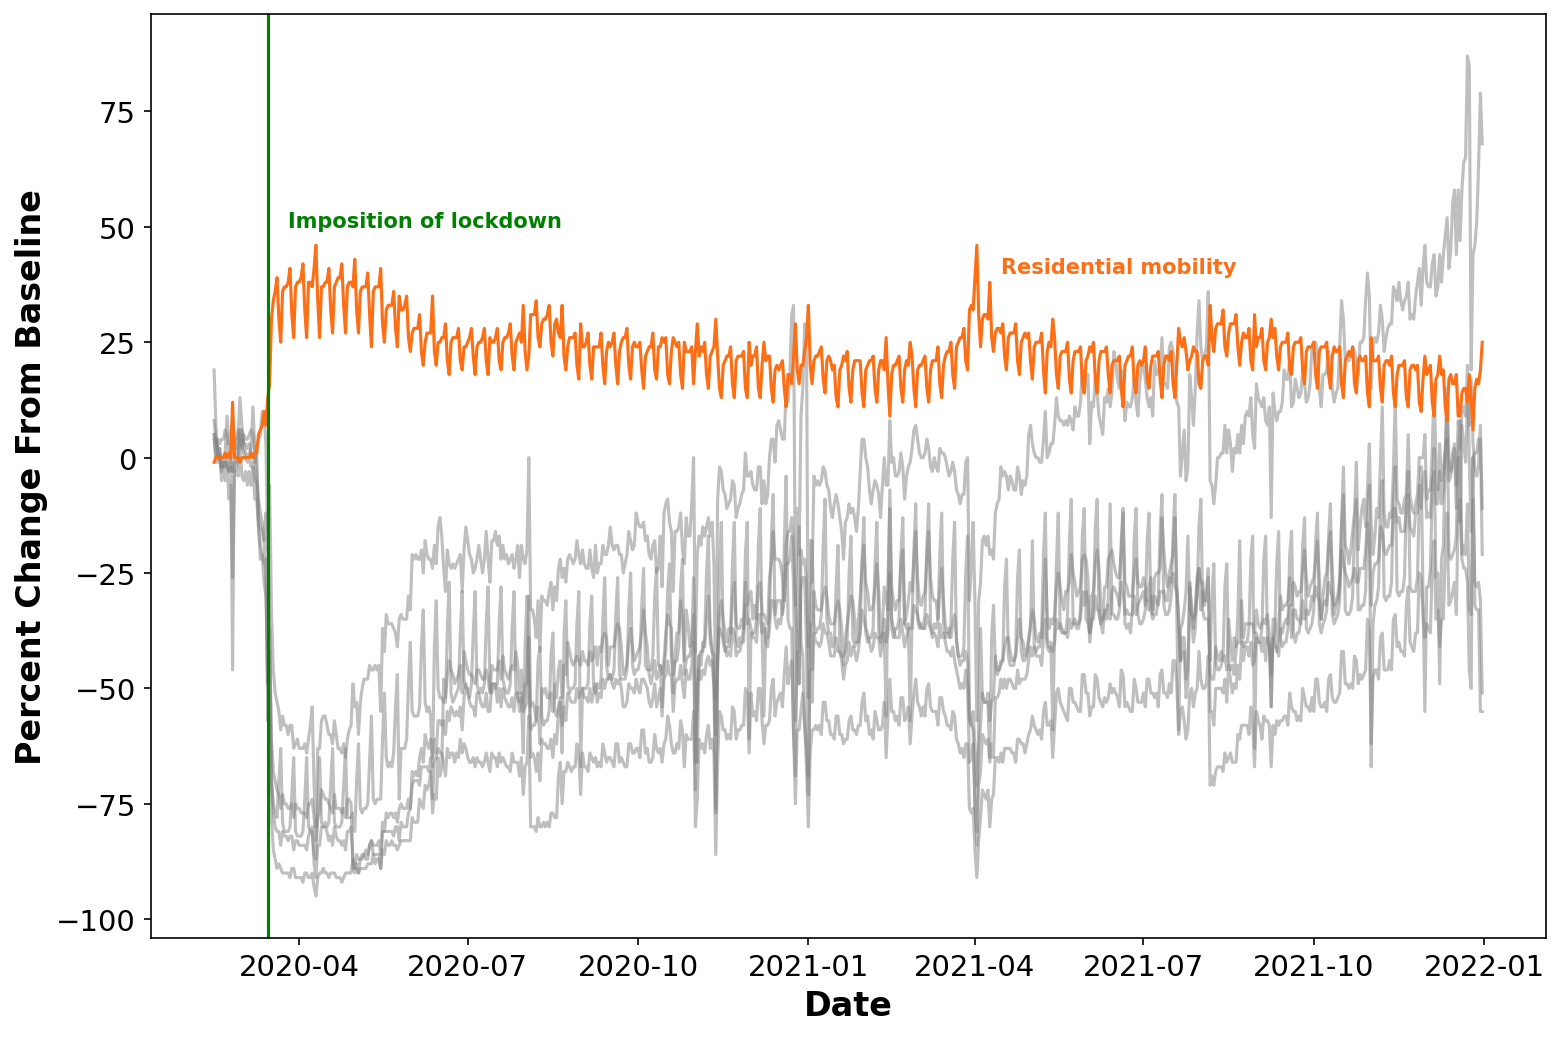

In [12]:
# Prepare figure
plt.figure(figsize=(12,8), dpi = 150)

# Initiate list of columns
mobility_columns=list(mobility.columns)

# If residential, plot in orange. Else, plot in gray.
for mobility_column in mobility_columns:
  if mobility_column=="date":
    continue
  elif mobility_column=="residential_percent_change_from_baseline":
    plt.plot(
        mobility["date"],
        mobility[mobility_column],
        color="#fb6f17",
    )
  else:
    plt.plot(
        mobility["date"],
        mobility[mobility_column],
        color='#808080',
        alpha=0.5
    )

# Add labels
plt.xlabel("Date", weight="bold")
plt.ylabel("Percent Change From Baseline", weight="bold")

# Add annotations
plt.annotate(
    "Residential mobility",
    xytext=(datetime(2021, 4, 15), 40),
    xy=(
        datetime(2020, 3, 12),
        0
    ),
    weight="bold",
    color="#fb6f17"
)
plt.annotate(
    "Imposition of lockdown",
    xytext=(mobility["date"].min()+timedelta(days=40), 50),
    xy=(
        datetime(2020, 3, 12),
        0
    ),
    weight="bold",
    color="green"
)

# Add vertical axis line
plt.axvline(x=datetime(2020,3,15),color="green")

# Show plot
plt.show()

### Let's highlight workplaces!

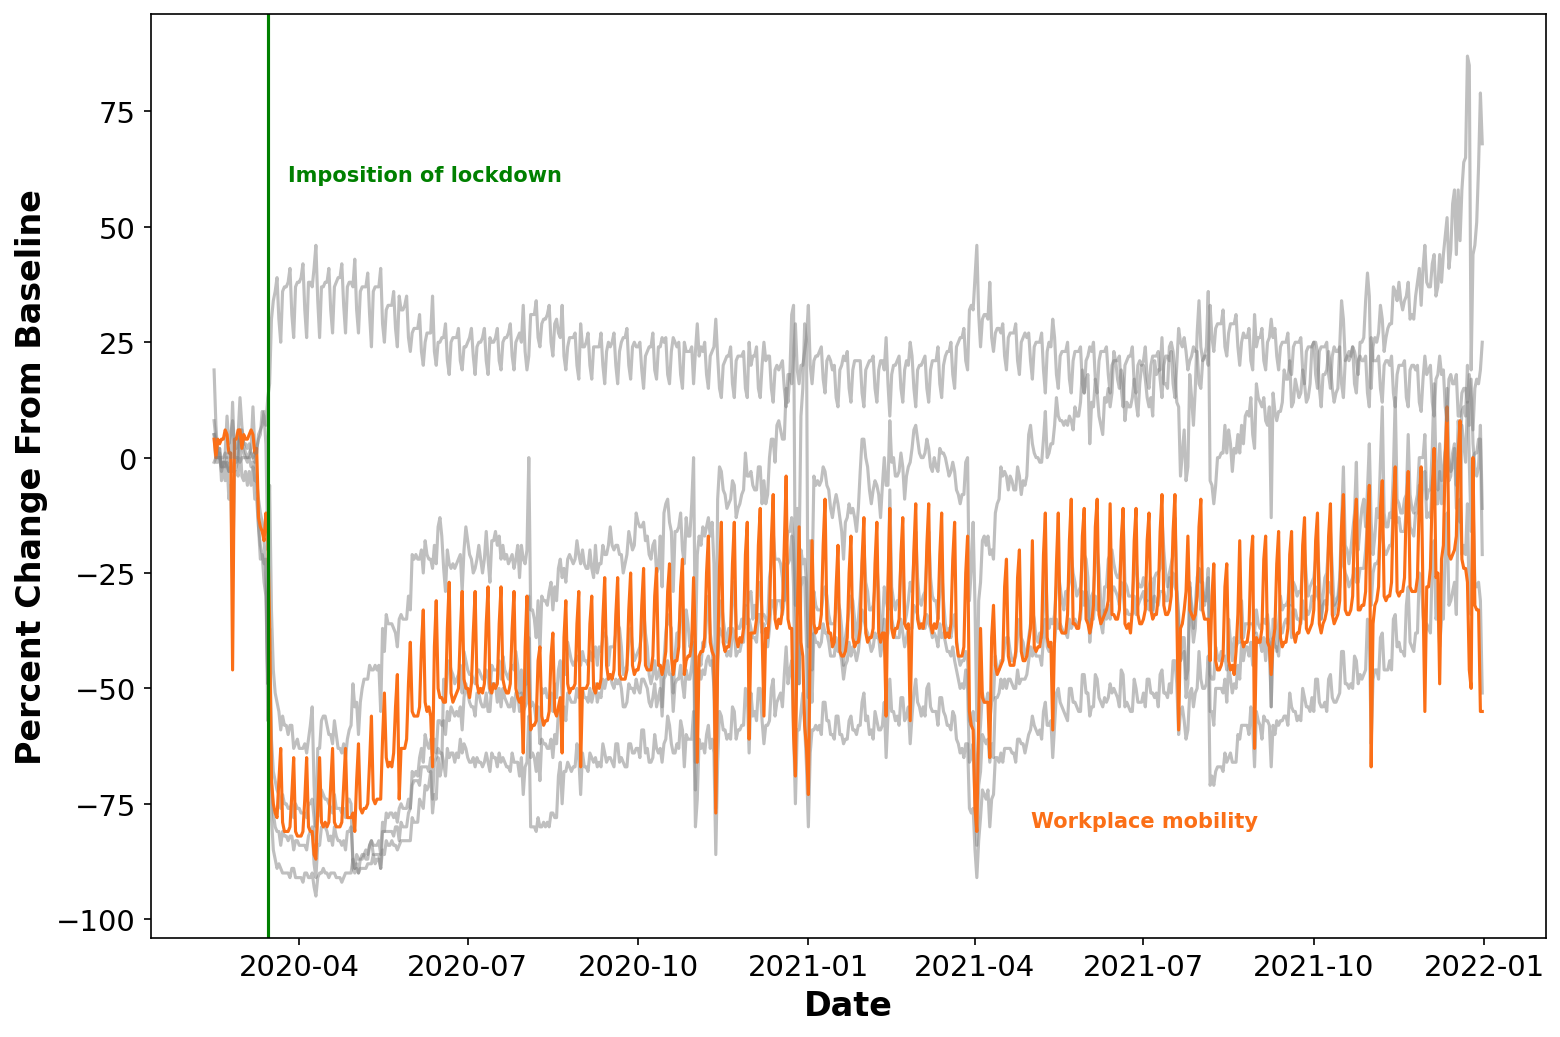

In [13]:
# Prepare figure
plt.figure(figsize=(12,8), dpi = 150)

# Initiate list of columns
mobility_columns=list(mobility.columns)

# If workplace, plot in orange. Else, plot in gray.
for mobility_column in mobility_columns:
  if mobility_column=="date":
    continue
  elif mobility_column=="workplaces_percent_change_from_baseline":
    plt.plot(
        mobility["date"],
        mobility[mobility_column],
        color="#fb6f17",
    )
  else:
    plt.plot(
        mobility["date"],
        mobility[mobility_column],
        color='#808080',
        alpha=0.5
    )

# Add labels
plt.xlabel("Date", weight="bold")
plt.ylabel("Percent Change From Baseline", weight="bold")

# Add annotations
plt.annotate(
    "Workplace mobility",
    xytext=(datetime(2021, 5, 1), -80),
    xy=(
        datetime(2020, 3, 12),
        0
    ),
    weight="bold",
    color="#fb6f17"
)
plt.annotate(
    "Imposition of lockdown",
    xytext=(mobility["date"].min()+timedelta(days=40), 60),
    xy=(
        datetime(2020, 3, 12),
        0
    ),
    weight="bold",
    color="green"
)

# Add vertical axis line
plt.axvline(x=datetime(2020,3,15),color="green")

# Plot data
plt.show()